In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot
import matplotlib.pyplot as plt
import cv2
from PIL import Image
import os
import keras
from keras.utils import to_categorical

Using TensorFlow backend.


In [0]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [4]:
!unzip "/content/drive/My Drive/Springboard/Capstone 2/cell-images-for-detecting-malaria.zip"

Streaming output truncated to the last 5000 lines.
  inflating: cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_118.png  
  inflating: cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_126.png  
  inflating: cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_134.png  
  inflating: cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_141.png  
  inflating: cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_168.png  
  inflating: cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_175.png  
  inflating: cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_183.png  
  inflating: cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_221.png  
  inflating: cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_222.png  
  inflating: cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_87.png  
  inflating: cell_im

In [0]:
#defining empty data and label lists
data_1 = []
labels_1 = []

In [0]:
#importing and processing the infected cell images
parasitized = "/content/cell_images/Parasitized/"
for filename in os.listdir(parasitized):
    img = cv2.imread(parasitized+filename)     # Read image as an array
    if img is not None:
        img_arr = Image.fromarray(img , 'RGB') #Converting image from array to an RGB image.
        re_img = img_arr.resize((64 , 64))     #Resizing image
        data_1.append(np.array(re_img))          #appending image after converting it back to array
        labels_1.append(to_categorical(1, num_classes=2))

In [0]:
#importing and processing the infected cell images
uninfected = "/content/cell_images/Uninfected/"
for filename in os.listdir(uninfected):
    img = cv2.imread(uninfected+filename)
    if img is not None:
        img_arr = Image.fromarray(img , 'RGB')
        re_img = img_arr.resize((64 , 64))
        data_1.append(np.array(re_img))
        labels_1.append(to_categorical(0, num_classes=2))

In [0]:
#Converting data and labels to numpy array
data = np.array(data_1)
labels = np.array(labels_1)

In [10]:
data.shape

(27558, 64, 64, 3)

In [11]:
labels.shape

(27558, 2)

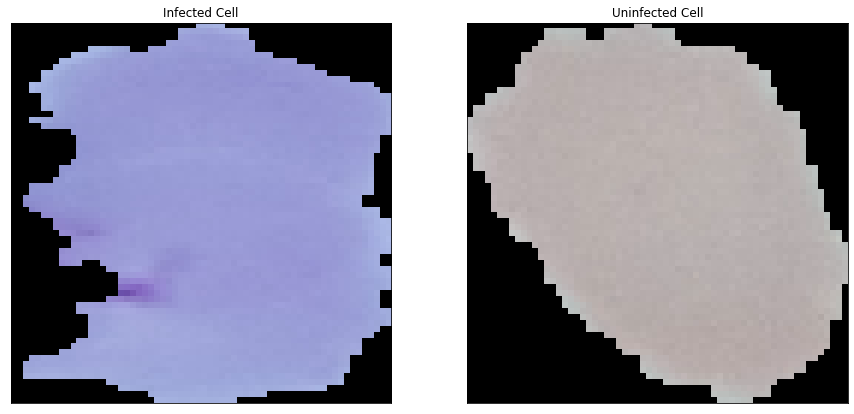

In [12]:
plt.figure(1, figsize = (15 , 7))
plt.subplot(1 , 2 , 1)
plt.imshow(data[0])
plt.title('Infected Cell')
plt.xticks([]) , plt.yticks([])

plt.subplot(1 , 2 , 2)
plt.imshow(data[16000])
plt.title('Uninfected Cell')
plt.xticks([]) , plt.yticks([])

plt.show()

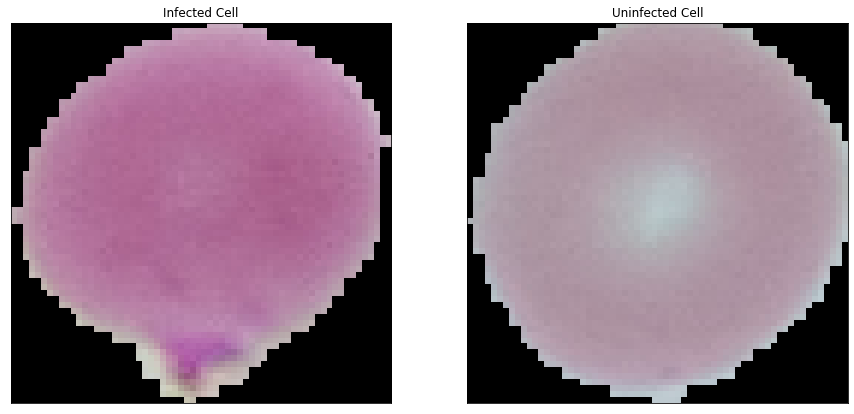

In [13]:
plt.figure(1, figsize = (15 , 7))
plt.subplot(1 , 2 , 1)
plt.imshow(data[1])
plt.title('Infected Cell')
plt.xticks([]) , plt.yticks([])

plt.subplot(1 , 2 , 2)
plt.imshow(data[15999])
plt.title('Uninfected Cell')
plt.xticks([]) , plt.yticks([])

plt.show()

In [14]:
data.shape[0]

27558

In [0]:
#Initializing a random sequence of number which is the same length as of data
n = np.arange(data.shape[0])
np.random.shuffle(n)

In [16]:
n

array([16640, 21911, 18792, ..., 24706,  1497, 11811])

In [0]:
data = data[n]
labels = labels[n]

In [0]:
data = data[:5000]
labels = labels[:5000]

In [19]:
labels

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [1., 0.],
       [0., 1.]], dtype=float32)

In [0]:
#Changing data type to float
data = data.astype(np.float32)
labels = labels.astype(np.int32)

In [0]:
#Scaling the data
data = data/255

In [0]:
#Splitting the data into train and eval
from sklearn.model_selection import train_test_split

train_x , eval_x , train_y , eval_y = train_test_split(data , labels , 
                                            test_size = 0.3 ,
                                            random_state = 111)

In [0]:
#Splitting data into test and validation
val_x , test_x , val_y , test_y = train_test_split(eval_x, eval_y , 
                                            test_size = 0.5 ,
                                            random_state = 111)

In [24]:
print('train data shape {} ,val data shape {} '.format(train_x.shape, val_x.shape))

train data shape (3500, 64, 64, 3) ,val data shape (750, 64, 64, 3) 


In [0]:
# Generating augmented images

from keras.preprocessing.image import ImageDataGenerator

train_aug = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,  
    zoom_range=0.2,        
    horizontal_flip=True,
    vertical_flip=True)  

val_aug= ImageDataGenerator(
    rescale=1./255)

test_aug= ImageDataGenerator(
    rescale=1./255)

train_gen = train_aug.flow(
    train_x,
    train_y,
    batch_size=16)

val_gen = val_aug.flow(
    val_x,
    val_y,
    batch_size=16)

test_gen = test_aug.flow(
    test_x,
    test_y,
    batch_size=16)

In [0]:
def show_final_history(history):
    fig, ax = plt.subplots(1, 2, figsize=(15,5))
    ax[0].set_title('loss')
    ax[0].plot(history.epoch, history.history["loss"], label="Train loss")
    ax[0].plot(history.epoch, history.history["val_loss"], label="Validation loss")
    ax[1].set_title('acc')
    ax[1].plot(history.epoch, history.history["acc"], label="Train acc")
    ax[1].plot(history.epoch, history.history["val_acc"], label="Validation acc")
    ax[0].legend()
    ax[1].legend()

In [0]:
from keras.models import Sequential
from keras.layers import SeparableConv2D,BatchNormalization,MaxPooling2D,Conv2D
from keras.callbacks import ModelCheckpoint,EarlyStopping,ReduceLROnPlateau
from keras.layers import Dense,Flatten,Dropout,Lambda

In [28]:
#Defining model layers and parameters
def ConvBlock(model, layers, filters,name):
    for i in range(layers):
        model.add(Conv2D(filters, (3, 3), activation='relu',name=name))
        model.add(BatchNormalization())
        model.add(MaxPooling2D((2, 2)))
        #model.add(Dropout(0.2))
    
def FCN():
    model = Sequential()
    model.add(Lambda(lambda x: x, input_shape=(64, 64, 3)))
    ConvBlock(model, 1, 64,'block_1')
    ConvBlock(model, 1, 128,'block_2')
    ConvBlock(model, 1, 256,'block_3')
    ConvBlock(model, 1, 512,'block_4')
    model.add(Flatten())
    model.add(Dense(512,activation='relu'))
    model.add(Dropout(0.4))
    model.add(Dense(2,activation='sigmoid'))
    return model

model = FCN()
model.summary()













Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lambda_1 (Lambda)            (None, 64, 64, 3)         0         
_________________________________________________________________
block_1 (Conv2D)             (None, 62, 62, 64)        1792      
_________________________________________________________________
batch_normalization_1 (Batch (None, 62, 62, 64)        256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 64)        0         
_________________________________________________________________
block_2 (Conv2D)             (None, 29, 29, 128)       73856     
_________________________________________________________________
batch_normalization_2 (Batch (None, 29, 29, 128)       512 

In [0]:
# Defining Callbacks
best_model_weights = './base.model'

earlystop = EarlyStopping(       # Stop training when a monitored quantity has stopped improving.
    monitor='val_loss',
    min_delta=0.001,
    patience=7,
    verbose=2,
    mode='min')

checkpoint = ModelCheckpoint(
    best_model_weights,
    monitor='val_loss',
    verbose=1,
    save_best_only=True,
    mode='min',
    save_weights_only=False,
    period=1)

reducelr = ReduceLROnPlateau(    #Reduce learning rate when a metric has stopped improving
    monitor='val_loss',
    factor=0.5,
    patience=40,
    verbose=1, 
    mode='auto',
    cooldown=1 )

callbacks = [earlystop]

In [30]:
# Compiling model and fitting the data

model.compile(
    loss='binary_crossentropy',
    optimizer= 'adam', #try opt1 and directly adam
    metrics=['accuracy']
)

history = model.fit(x=train_x, y=train_y, batch_size=16,
                        epochs=10, verbose=1, callbacks=callbacks,
                        max_queue_size=10, workers=1, use_multiprocessing=False)

'''history = model.fit_generator(
    train_gen, 
    steps_per_epoch  = 500, 
    validation_data  = val_gen,
    validation_steps = 200,
    epochs = 10,
    #max_queue_size=10,
    use_multiprocessing=True,
    workers=-1, 
    verbose = 1,
    callbacks=callbacks
)'''



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/10
3500/3500 [==============================] - 11s 3ms/step - loss: 0.5804 - acc: 0.8244
Epoch 2/10
3500/3500 [==============================] - 3s 805us/step - loss: 0.2516 - acc: 0.9243
Epoch 3/10
3500/3500 [==============================] - 3s 808us/step - loss: 0.1990 - acc: 0.9381
Epoch 4/10
3500/3500 [==============================] - 3s 803us/step - loss: 0.1607 - acc: 0.9507
Epoch 5/10
3500/3500 [==============================] - 3s 810us/step - loss: 0.1435 - acc: 0.9524
Epoch 6/10
3500/3500 [==============================] - 3s 804us/step - loss: 0.1297 - acc: 0.9599
Epoch 7/10
3500/3500 [==============================] - 3s 806us/step - loss: 0.1161 - acc: 0.9611
Epoch 8/10
3500/3500 [==============================] - 3s 838us/step - loss: 0.1195 - acc: 0.9627
Epoch 9/10
3500/3500 [==============================] - 3s 810us/step - loss: 0.0930 - acc: 0.9677
Epoch 10/10


'history = model.fit_generator(\n    train_gen, \n    steps_per_epoch  = 500, \n    validation_data  = val_gen,\n    validation_steps = 200,\n    epochs = 10,\n    #max_queue_size=10,\n    use_multiprocessing=True,\n    workers=-1, \n    verbose = 1,\n    callbacks=callbacks\n)'

In [31]:
model_score = model.evaluate(x=eval_x, y=eval_y)
print("Model Test Loss:",model_score[0])
print("Model Test Accuracy:",model_score[1])

1500/1500 [==============================] - 1s 419us/step
Model Test Loss: 0.1580894017914931
Model Test Accuracy: 0.9463333333333334


In [0]:
#model_score = model.evaluate_generator(test_gen,steps=50)
#print("Model Test Loss:",model_score[0])
#print("Model Test Accuracy:",model_score[1])

In [0]:
#model_score = model.evaluate_generator(val_gen,steps=50)
#print("Model Test Loss:",model_score[0])
#print("Model Test Accuracy:",model_score[1])

In [0]:
#show_final_history(history)

In [35]:
from sklearn.metrics import confusion_matrix, classification_report
pred = model.predict(test_x)
pred = np.argmax(pred,axis = 1) 
y_true = np.argmax(test_y,axis = 1)

CM = confusion_matrix(y_true, pred)
print("Confusion Matrix")
print(CM)
print("--")
print("--")
print("Classification Report")
print(classification_report(y_true, pred))

Confusion Matrix
[[364  13]
 [ 25 348]]
--
--
Classification Report
              precision    recall  f1-score   support

           0       0.94      0.97      0.95       377
           1       0.96      0.93      0.95       373

    accuracy                           0.95       750
   macro avg       0.95      0.95      0.95       750
weighted avg       0.95      0.95      0.95       750

